In [98]:
! export PATH=/home/vt367012/.local/bin:$PATH

In [99]:
! pip install -q transformers==4.30.0 accelerate

In [100]:
! pip install -q diffusers==0.17.1 datasets datasets note-seq onnxruntime audiodiffusion

In [101]:
import numpy as np
from IPython.display import Audio

# pytorch
import torch

# huggingface
import transformers
from diffusers import DiffusionPipeline, Mel, SpectrogramDiffusionPipeline
from diffusers import DDPMScheduler, DDIMScheduler, PNDMScheduler

# https://huggingface.co/teticio/audio-encoder
from audiodiffusion.audio_encoder import AudioEncoder

import functools

# login to huggingface hub
#from huggingface_hub import notebook_login
#notebook_login()

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

# Music Generation using DDPM (De-noising Diffusion Probabilistic Models)

[Paper Link](https://arxiv.org/abs/2006.11239)  
[GitHub Repository](https://github.com/teticio/audio-diffusion)

This is an image generation model used as audio generation. The audio file is converted to mel-spectogram and then these spectogram can be generated through this diffusion model.

In [7]:
# try different models from the github repository
    # pass random noise to the diffusion model
    # convert the result from mel to mp3 and play it

In [102]:
# load pretrained model and move to device
pipeline = DiffusionPipeline.from_pretrained(
    "teticio/latent-audio-diffusion-256"
)

if device == "cuda":
    pipeline.to(device)

unet/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [9]:
pipeline

AudioDiffusionPipeline {
  "_class_name": "AudioDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "mel": [
    "audio_diffusion",
    "Mel"
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ],
  "vqvae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/1000 [00:00<?, ?it/s]

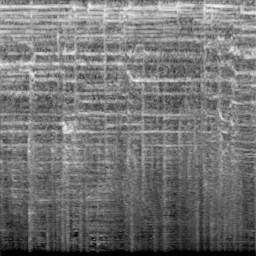

In [10]:
output = pipeline()
display(output.images[0])
display(Audio(output.audios[0], rate=pipeline.mel.get_sample_rate()))

  0%|          | 0/1 [00:00<?, ?it/s]

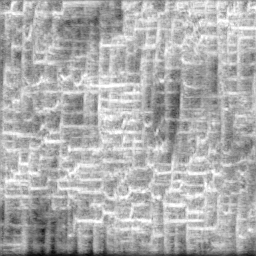

In [11]:
output = pipeline(steps=1)
display(output.images[0])
display(Audio(output.audios[0], rate=pipeline.mel.get_sample_rate()))

In [13]:
pipeline.scheduler.config

FrozenDict([('num_train_timesteps', 1000),
            ('beta_start', 0.0001),
            ('beta_end', 0.02),
            ('beta_schedule', 'linear'),
            ('trained_betas', None),
            ('variance_type', 'fixed_small'),
            ('clip_sample', True),
            ('prediction_type', 'epsilon'),
            ('thresholding', False),
            ('dynamic_thresholding_ratio', 0.995),
            ('clip_sample_range', 1.0),
            ('sample_max_value', 1.0),
            ('_class_name', 'DDPMScheduler'),
            ('_diffusers_version', '0.8.0.dev0')])

  0%|          | 0/50 [00:00<?, ?it/s]

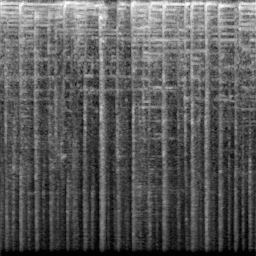

In [14]:
# using DDIM Scheduler on Latent Audio Diffusion
pipeline.scheduler = DDIMScheduler.from_config(pipeline.scheduler.config)

output = pipeline()
display(output.images[0])
display(Audio(output.audios[0], rate=pipeline.mel.get_sample_rate()))

In [15]:
pipeline

AudioDiffusionPipeline {
  "_class_name": "AudioDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "mel": [
    "audio_diffusion",
    "Mel"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ],
  "vqvae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [16]:
pipeline.unet.config

FrozenDict([('sample_size', [32, 32]),
            ('in_channels', 1),
            ('out_channels', 1),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 0),
            ('flip_sin_to_cos', True),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 1),
            ('act_fn', 'silu'),
            ('attention_head_dim', 8),
            ('norm_num_groups', 32),
            ('norm_eps',

In [17]:
# TODO: try customising the model as described https://huggingface.co/docs/diffusers/v0.16.0/en/quicktour#model
# since I cannot find another model suitable for spectogram generation, maybe use the same model but write your own pipeline to learn

# load pretrained model and move to device
pipeline = DiffusionPipeline.from_pretrained(
    "Hyeon2/riffusion-musiccaps"
)

if device == "cuda":
    pipeline.to(device)

safety_checker/model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [18]:
pipeline.unet.config

FrozenDict([('sample_size', 64),
            ('in_channels', 4),
            ('out_channels', 4),
            ('center_input_sample', False),
            ('flip_sin_to_cos', True),
            ('freq_shift', 0),
            ('down_block_types',
             ['CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'DownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2DCrossAttn'),
            ('up_block_types',
             ['UpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D']),
            ('only_cross_attention', False),
            ('block_out_channels', [320, 640, 1280, 1280]),
            ('layers_per_block', 2),
            ('downsample_padding', 1),
            ('mid_block_scale_factor', 1),
            ('act_fn', 'silu'),
            ('norm_num_groups', 32),
            ('norm_eps', 1e-05),
            ('cross_attention_dim', 768),
            ('e

In [103]:
# load pretrained model and move to device
pipeline = SpectrogramDiffusionPipeline.from_pretrained(
    "google/music-spectrogram-diffusion"
)

if device == "cuda":
    pipeline.to(device)

continuous_encoder/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
2023-06-18 23:37:36.628611059 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 170839, index: 11, mask: {12, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-06-18 23:37:36.628659606 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np failed for thread: 170840, index: 12, mask: {13, }, error code: 22 error msg: Invalid argument. Specify the number of threads explicitly so the affinity is not set.
2023-06-18 23:37:36.628703942 [E:onnxruntime:Default, env.cc:251 ThreadMain] pthread_setaffinity_np fail

In [20]:
pipeline

SpectrogramDiffusionPipeline {
  "_class_name": "SpectrogramDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "continuous_encoder": [
    "spectrogram_diffusion",
    "SpectrogramContEncoder"
  ],
  "decoder": [
    "diffusers",
    "T5FilmDecoder"
  ],
  "melgan": [
    "diffusers",
    "OnnxRuntimeModel"
  ],
  "notes_encoder": [
    "spectrogram_diffusion",
    "SpectrogramNotesEncoder"
  ],
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ]
}

In [21]:
# load pretrained model and move to device
pipeline_conditional = DiffusionPipeline.from_pretrained(
    "teticio/conditional-latent-audio-diffusion-512"
)
pipeline_conditional.scheduler = DDIMScheduler.from_config(pipeline_conditional.scheduler.config)

# https://github.com/teticio/audio-diffusion/blob/main/notebooks/conditional_generation.ipynb
audio_encoder = AudioEncoder.from_pretrained("teticio/audio-encoder")

if device == "cuda":
    pipeline_conditional.to(device)

unet/diffusion_pytorch_model.safetensors not found


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [22]:
pipeline_conditional

AudioDiffusionPipeline {
  "_class_name": "AudioDiffusionPipeline",
  "_diffusers_version": "0.17.1",
  "mel": [
    "audio_diffusion",
    "Mel"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vqvae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [106]:
def load_music(path_to_music):

    return torch.unsqueeze(audio_encoder.encode([path_to_music]), axis=1).to(device)

audio = load_music('../sample_music/conditional_input.wav')
audio.shape

torch.Size([1, 1, 100])

  0%|          | 0/50 [00:00<?, ?it/s]

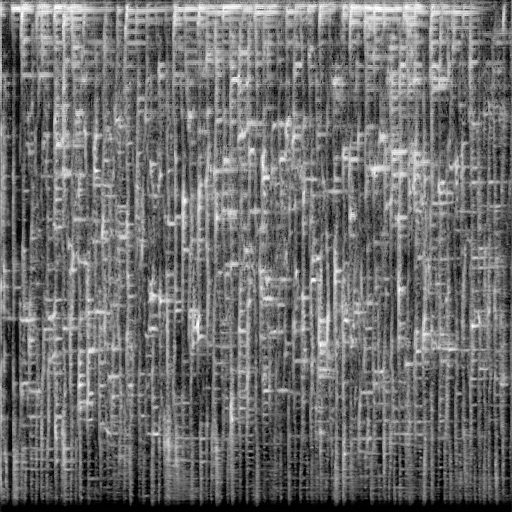

In [107]:
output = pipeline_conditional(encoding=audio)
display(output.images[0])
display(Audio(output.audios[0], rate=pipeline_conditional.mel.get_sample_rate()))

In [48]:
# implementing pipeline for teticio/latent-audio-diffusion-256 model

from diffusers import (
    Mel, 
    DDPMScheduler, DDIMScheduler, 
    UNet2DModel, 
    AutoencoderKL
)

from PIL import Image
import numpy as np

In [49]:
repo_id = "teticio/latent-audio-diffusion-ddim-256"

mel = Mel.from_config(repo_id, subfolder="mel")
ddpm_scheduler = DDPMScheduler.from_config(repo_id, subfolder="scheduler")
ddim_scheduler = DDIMScheduler.from_config(repo_id, subfolder="scheduler")
unet = UNet2DModel.from_pretrained(repo_id, subfolder = "unet").to(device)
autoencoder = AutoencoderKL.from_pretrained(repo_id, subfolder="vqvae").to(device)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


In [97]:
# generate noise
# denoise it using unet and scheduler
# after every (~10 steps), output produced denoise image and music

# to convert image to spectogram use autoencoder (because its in latent space)

# do all the above steps for two schedulers and different timesteps

In [50]:
def generate_noisy_sample(model):

    global device

    in_channels = model.config.in_channels
    sample_size = model.config.sample_size
    with torch.no_grad():
        noise = torch.randn(
            (1, in_channels, sample_size[0], sample_size[1])
        ).to(device)
    
    return noise

In [86]:
# what is eta in DDIM scheduler: https://github.com/teticio/audio-diffusion/blob/04551275e4dbcc738a6145a6ce3954251dfaf738/audiodiffusion/pipeline_audio_diffusion.py#L169

def remove_noise(input_noise, custom_model, custom_scheduler, callbacks = None, callbacks_steps=100):

    for i, t in enumerate(custom_scheduler.timesteps):
        with torch.no_grad():
            noise_residual = custom_model(input_noise, t).sample
        input_noise = custom_scheduler.step(noise_residual, t, input_noise).prev_sample

        if callbacks is not None:
            if (i+1) % callbacks_steps == 0:
                print("Iteration Number: ", i+1)
                for func in callbacks:
                    func(input_noise)

    return input_noise

In [87]:
# check how to decode properly: https://github.com/teticio/audio-diffusion/blob/04551275e4dbcc738a6145a6ce3954251dfaf738/audiodiffusion/pipeline_audio_diffusion.py#L186

def latent_to_image(custom_autoencoder, latents):
    
    latents = 1 / 0.18215 * latents
    image = custom_autoencoder.decode(latents)["sample"]
    
    image = (image / 2 + 0.5).clamp(0, 1)
    
    image = image.cpu().permute(0, 2, 3, 1).detach().numpy()
    image = (image * 255).round().astype("uint8")
    
    image = Image.fromarray(image[0,:,:,0])
    return image

In [88]:
def spectogram_to_audio(mel, image):
    audio = mel.image_to_audio(image)
    return audio

In [92]:
def display_latents_and_audio(autoencoder, mel, latents):
    image = latent_to_image(autoencoder, latents)
    audio = spectogram_to_audio(mel, image)
    
    display(image)
    display(Audio(audio, rate=mel.get_sample_rate()))

Complete Noise


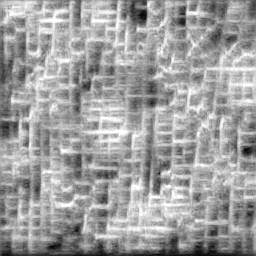

Iteration Number:  10


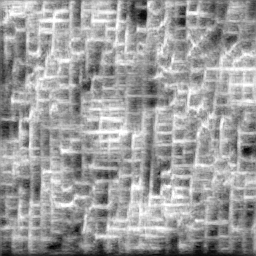

Iteration Number:  20


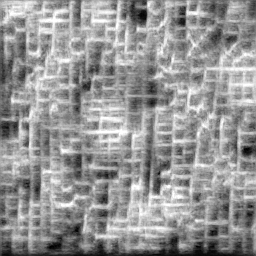

Iteration Number:  30


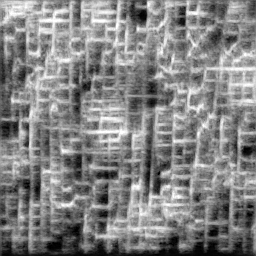

Iteration Number:  40


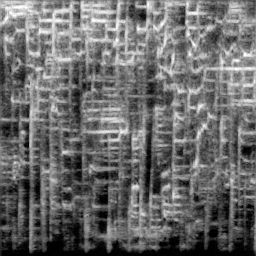

Iteration Number:  50


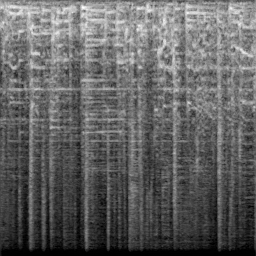

In [95]:
ddim_scheduler.set_timesteps(50)

noisy_sample = generate_noisy_sample(unet)

display_latents_and_audio_partial = functools.partial(display_latents_and_audio, autoencoder, mel)

print("Complete Noise")
display_latents_and_audio_partial(noisy_sample)

remove_noise(noisy_sample, unet, ddim_scheduler, callbacks=[display_latents_and_audio_partial], callbacks_steps=10)

Complete Noise


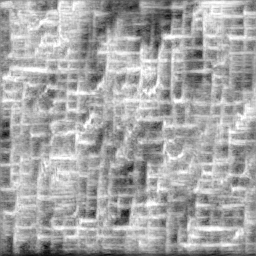

Iteration Number:  200


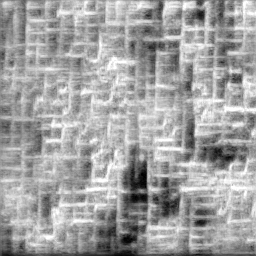

Iteration Number:  400


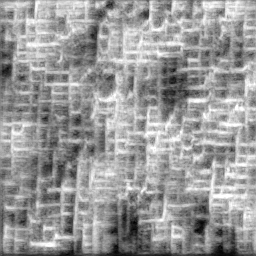

Iteration Number:  600


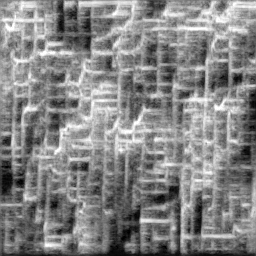

Iteration Number:  800


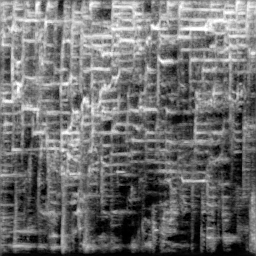

Iteration Number:  1000


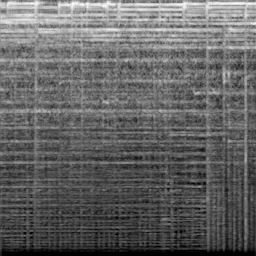

tensor([[[[-0.4186,  0.3674,  0.0121,  ...,  0.4010,  0.0106, -0.0665],
          [-0.6664, -0.5216, -0.5427,  ..., -0.6282, -0.1944, -0.5288],
          [ 0.2018, -0.1808, -0.0378,  ..., -0.3324,  0.0426, -0.2852],
          ...,
          [-0.7925, -0.7681, -0.8909,  ..., -0.7069, -0.7906, -0.3771],
          [-0.7294, -0.6136, -0.7149,  ..., -0.9920, -0.4876, -0.5969],
          [-0.5505, -0.6965, -0.6157,  ..., -0.6568, -0.9929, -0.3584]]]],
       device='cuda:0')

In [96]:
ddpm_scheduler.set_timesteps(1000)

noisy_sample = generate_noisy_sample(unet)

display_latents_and_audio_partial = functools.partial(display_latents_and_audio, autoencoder, mel)

print("Complete Noise")
display_latents_and_audio_partial(noisy_sample)

remove_noise(noisy_sample, unet, ddpm_scheduler, callbacks=[display_latents_and_audio_partial], callbacks_steps=200)